# ASSGN 5 : EDA & HYPOTHESIS TESTING

#### FALL 2025 | DS219 | ABDUL RAFAY
---

**DATASET OF CHOICE:** **Adult Income Dataset** / Census-based data for predicting if income exceeds $50K/year.

**GOAL** : Analyze if any interesting associations in the Income Dataset.

---

#### IMPORTS

Organize all of the imports in the cell below for clean notebook.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno

#### LOAD DATA

When initially loaded, it seems data was missing header resulting with 2 columns, when instead it should have 15.

In [3]:
# Define header structure explicitly
header = [
    "age",
    "workclass",
    "fnlwgt",
    "education",
    "education-num",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "capital-gain",
    "capital-loss",
    "hours-per-week",
    "native-country",
    "income"
]

So, header was explicitly defined as above. Data structure info referenced from [UCI ML Repo : Adult Income](https://archive.ics.uci.edu/dataset/2/adult). It was then loaded as dataframe.

In [14]:
# Load as dataframe with header defined.
df = pd.read_csv('adult.data', header=None, names=header, skipinitialspace=True)

In [15]:
# Print first three rows.
df.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


#### MSNO MODULE

Using missingno module, we can visualize entire data set to see if any missing portion in data. 

It is a nice visual that gives birds eye view of the data. I always use it. :)

<Axes: >

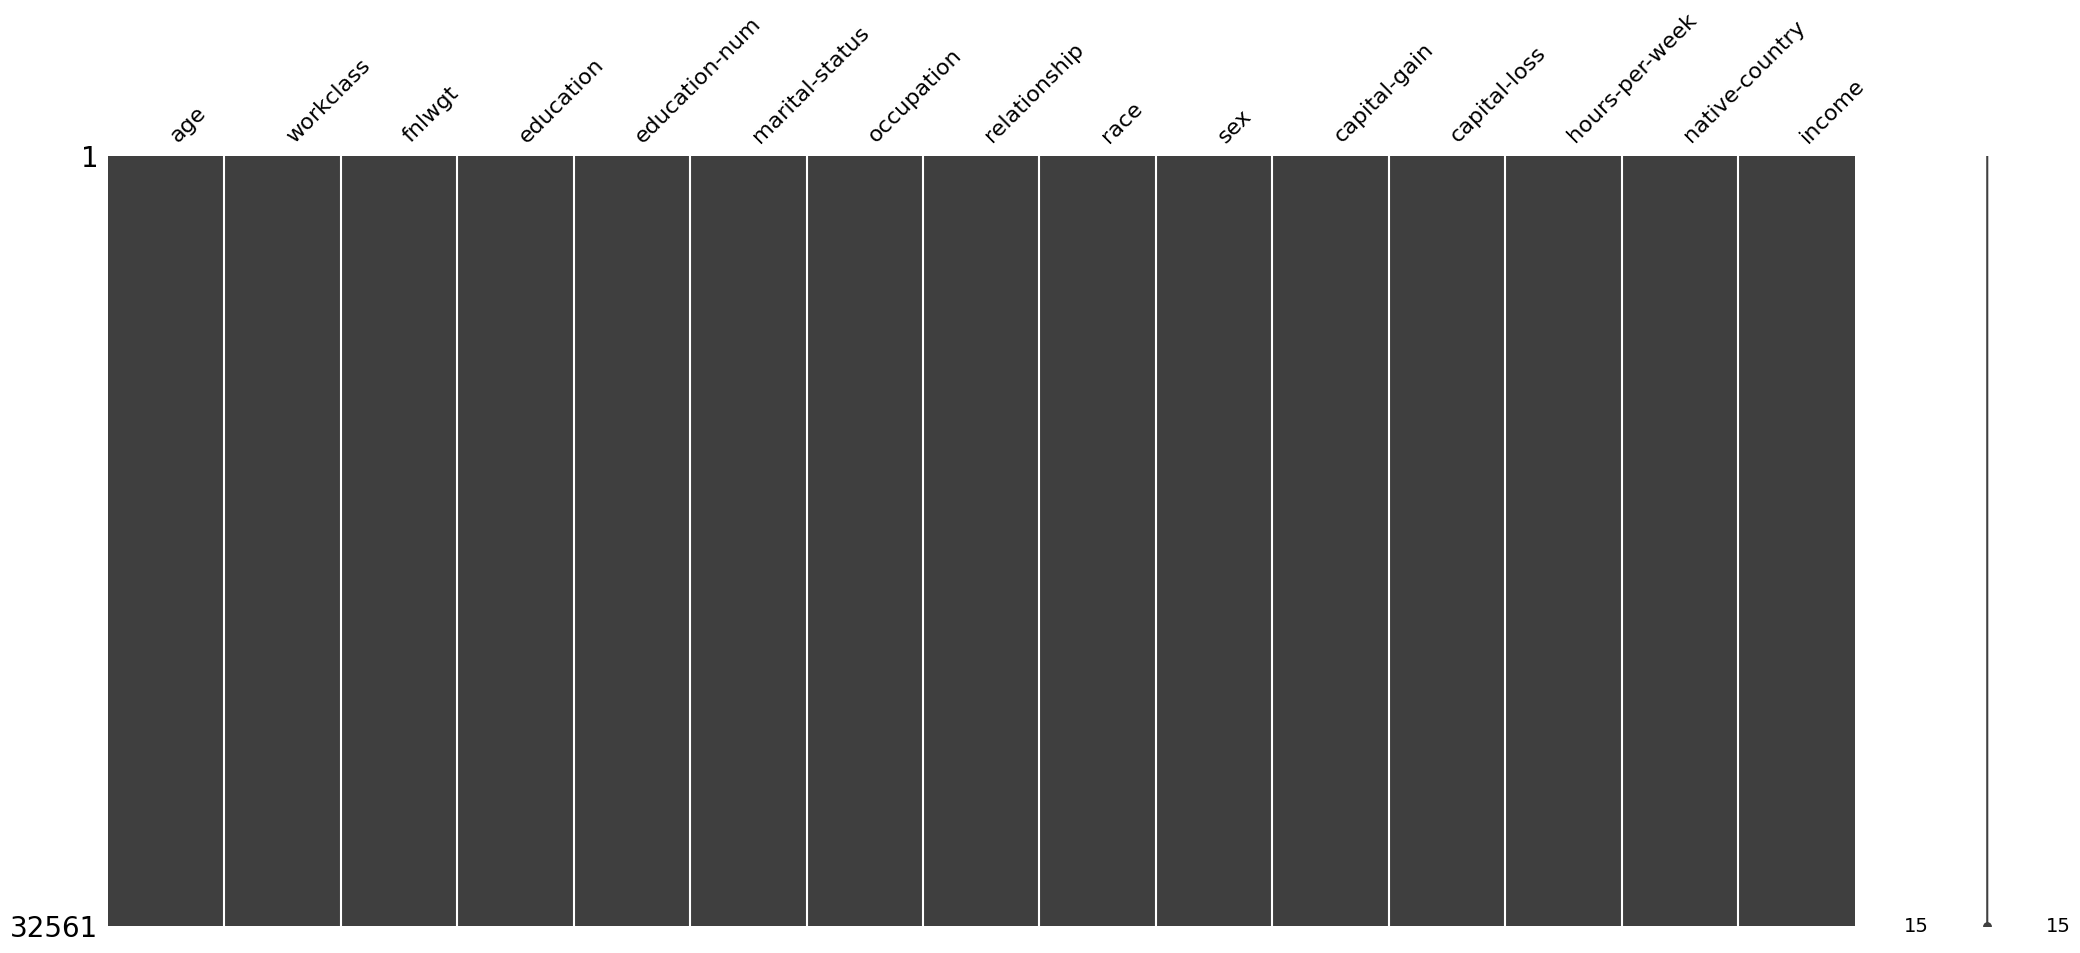

In [6]:
# Visualize any missing portion
msno.matrix(df)

It seems data is complete with no missing portion. It has 15 columns, and 32561 rows. Let's move on further into EDA.

#### Target Variable Distribution

=== Target Variable ===

Distribution:
 income
<=50K    24720
>50K      7841
Name: count, dtype: int64


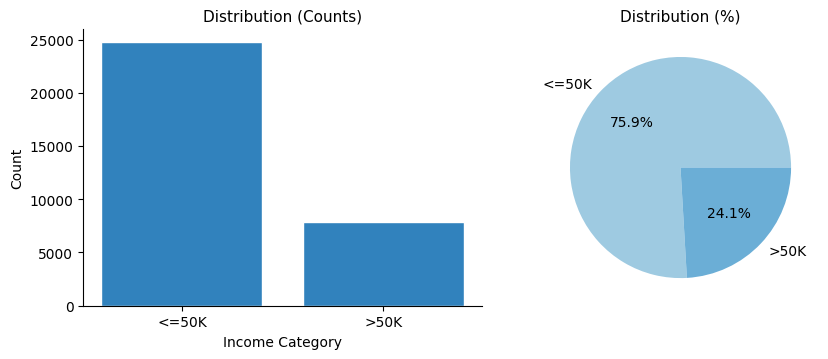

In [6]:
# Target variable overview
print("=== Target Variable ===\n")
target_counts = df['income'].value_counts()
print("Distribution:\n", target_counts)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(9, 3.7))

# Bar chart
axes[0].bar(target_counts.index, target_counts.values, color='#3182bd', edgecolor='white')
axes[0].set_title('Distribution (Counts)', fontsize=11)
axes[0].set_xlabel('Income Category')
axes[0].set_ylabel('Count')
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)

# Pie chart (minimalist)
axes[1].pie(
    target_counts.values,
    labels=target_counts.index,
    autopct='%1.1f%%',
    colors=['#9ecae1', '#6baed6'],
    textprops={'fontsize': 10}
)
axes[1].set_title('Distribution (%)', fontsize=11)

plt.tight_layout()
plt.show()

This is good to know, we have about 76% of people with income less than $50k from CENSUS dataset.

#### Numerical and Categorical Variable Distributions.

Let's check dtypes of each column to assess dustributions by their types.

In [7]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

=== NUMERICAL VARIABLES ===
Numerical columns: ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


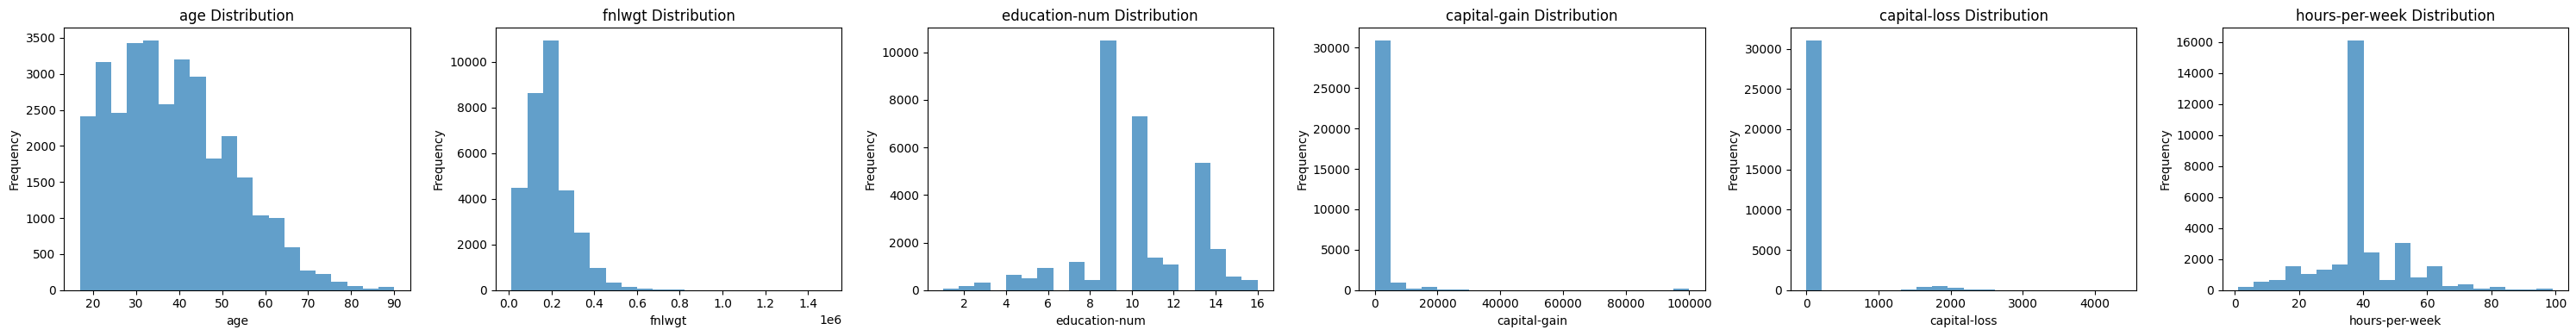

In [8]:
# Numerical variables analysis
print("=== NUMERICAL VARIABLES ===")
numerical_cols = df.select_dtypes(include=[np.number]).columns
print(f"Numerical columns: {list(numerical_cols)}")

# Create histograms for numerical variables
fig, axes = plt.subplots(1, len(numerical_cols), figsize=(5*len(numerical_cols), 4))
if len(numerical_cols) == 1:
    axes = [axes]

for i, col in enumerate(numerical_cols):
    axes[i].hist(df[col], bins=20, alpha=0.7)
    axes[i].set_title(f'{col} Distribution')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


Didn't really find anything meaninful here.

### Various EDA Visualizations

=== CATEGORICAL VARIABLES ===
Categorical columns: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']

workclass value counts:
workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64


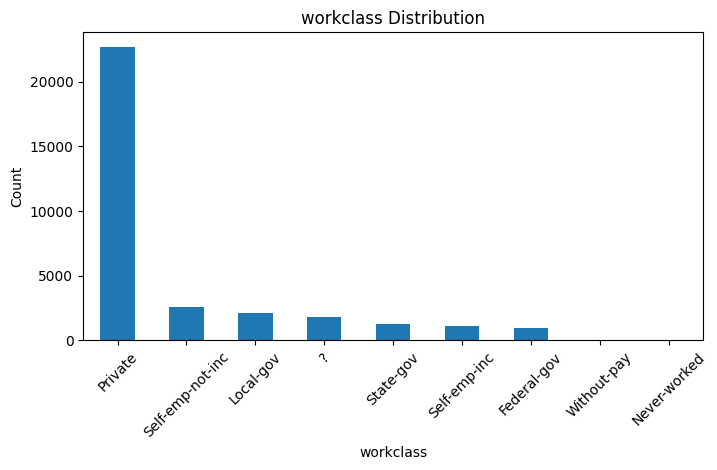


education value counts:
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64


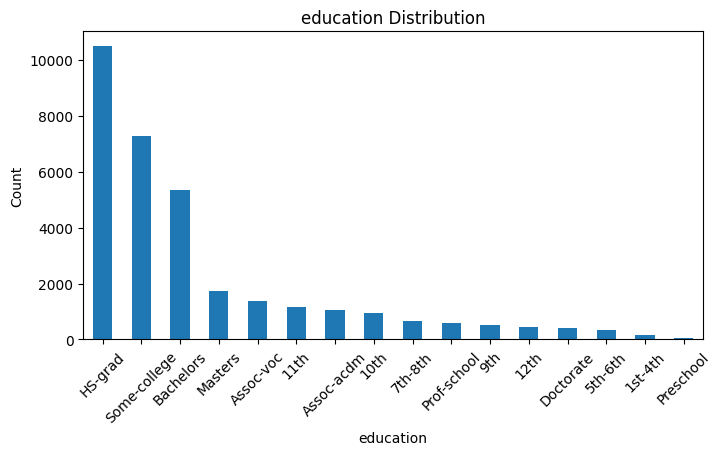


marital-status value counts:
marital-status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64


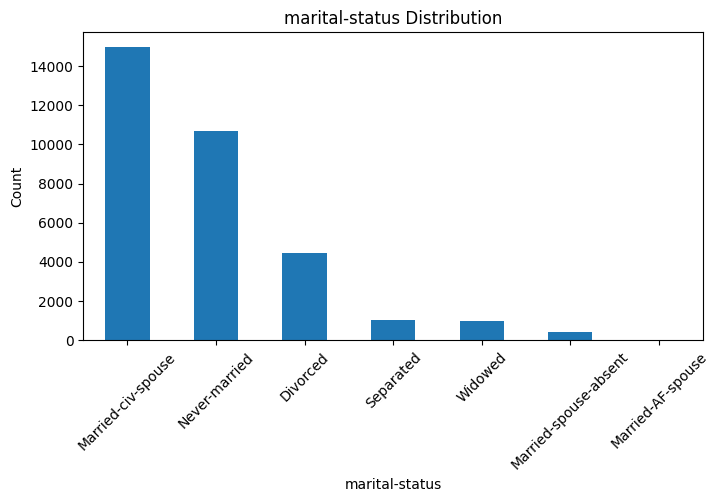


occupation value counts:
occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64


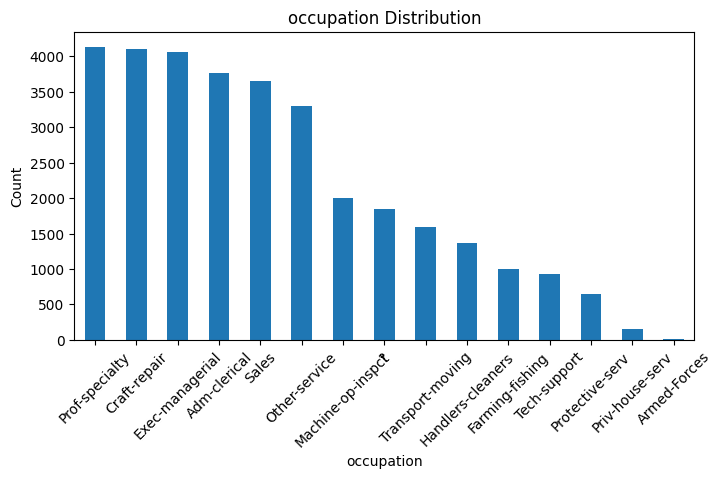


relationship value counts:
relationship
Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: count, dtype: int64


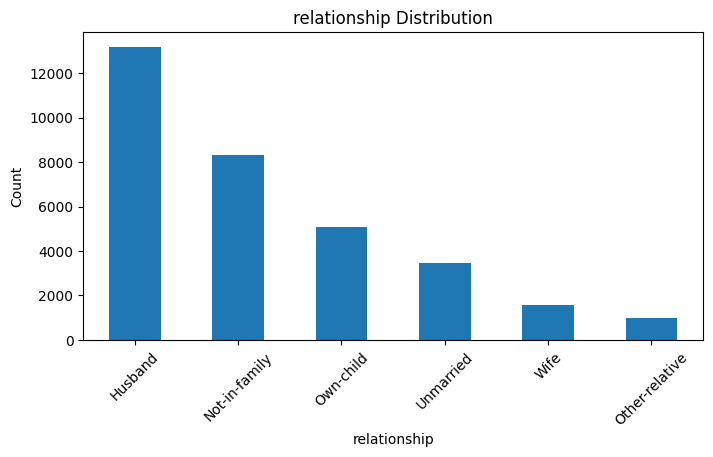


race value counts:
race
White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: count, dtype: int64


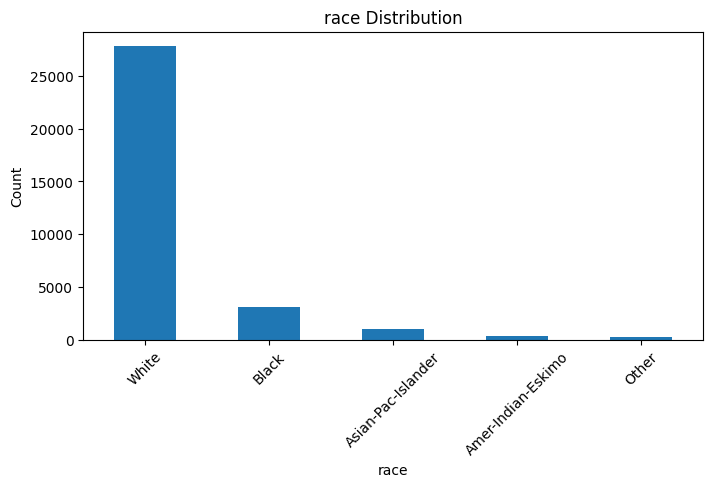


sex value counts:
sex
Male      21790
Female    10771
Name: count, dtype: int64


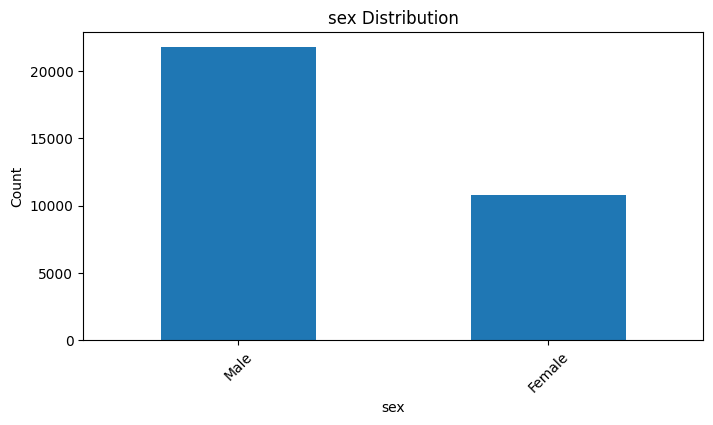


native-country value counts:
native-country
United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru               

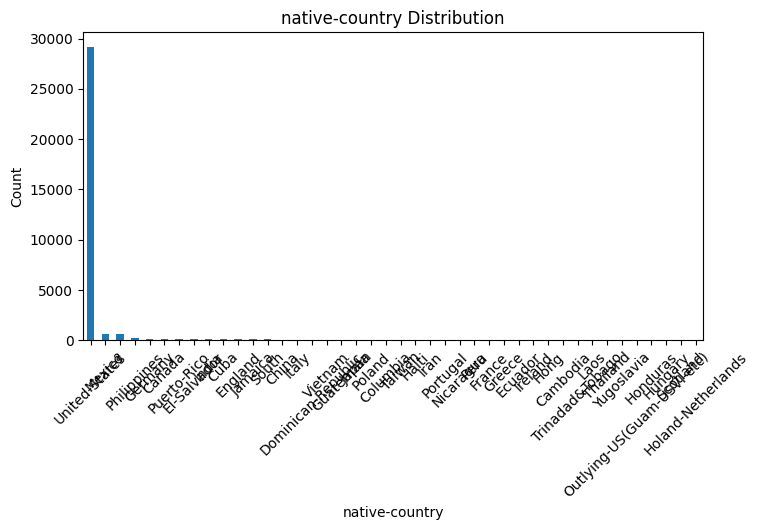


income value counts:
income
<=50K    24720
>50K      7841
Name: count, dtype: int64


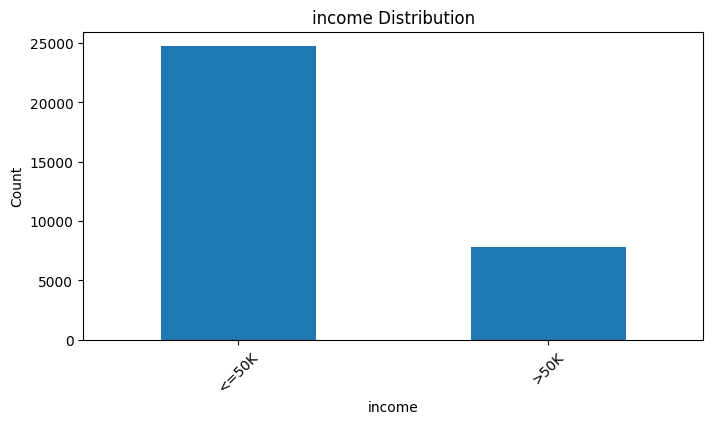

In [9]:
# Categorical variables analysis
print("=== CATEGORICAL VARIABLES ===")
categorical_cols = df.select_dtypes(include=['object']).columns
print(f"Categorical columns: {list(categorical_cols)}")

for col in categorical_cols:
    print(f"\n{col} value counts:")
    print(df[col].value_counts())
    
    # Create bar plot
    plt.figure(figsize=(8, 4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

These graphs, gives good overview of the data's general disrtributions. 

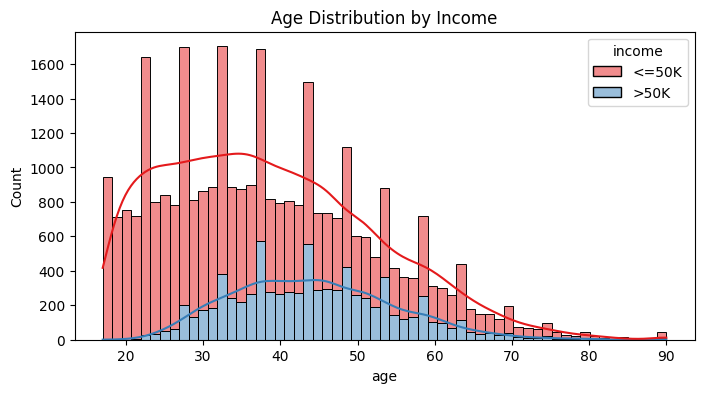

In [13]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x="age", hue="income", multiple="stack", palette="Set1", kde=True)
plt.title("Age Distribution by Income")
plt.show()

This is interesting. Unsure of the spikes in between, but the trend is still visible. The younger age group predominates the <=50k category. >50k seems to have a normal distrbution with mean value around 45. It is on the older age side. There might be meaningful association between age and income.

/var/folders/ys/v8w470f90yj1swtgwn15jdkh0000gn/T/ipykernel_18262/775712302.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="income", y="age", data=df, palette="Pastel1")


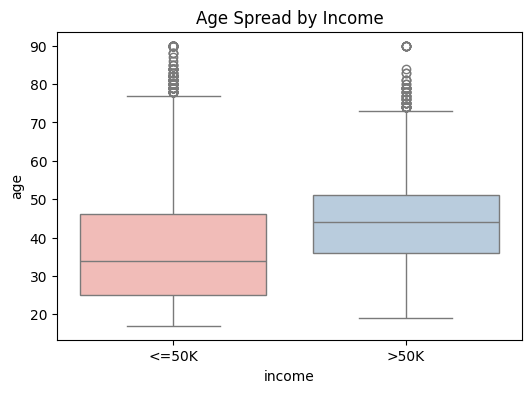

In [15]:
plt.figure(figsize=(6, 4))
sns.boxplot(x="income", y="age", data=df, palette="Pastel1")
plt.title("Age Spread by Income")
plt.show()

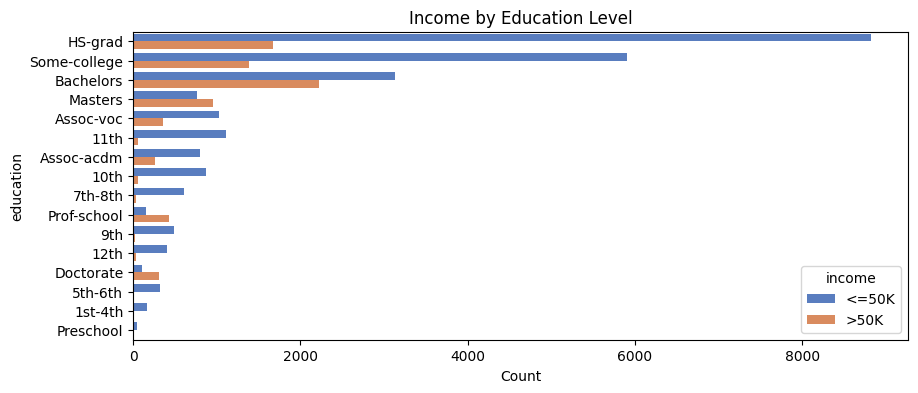

In [16]:
plt.figure(figsize=(10, 4))
order = df['education'].value_counts().index
sns.countplot(y="education", hue="income", data=df, order=order, palette="muted")
plt.title("Income by Education Level")
plt.xlabel("Count")
plt.show()

This plot gives a lot. For <=50k, HS-grad are predominant. Masters is the first higher level education in which >50k outnumbers the <=50k.

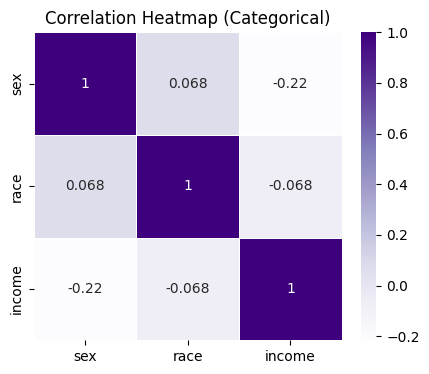

In [17]:
# Example with simplified label encoding for 'sex', 'income'
cat_vars = ["sex", "race", "income"] # Add more categories between '' if desired

df_encoded = df[cat_vars].apply(lambda x: pd.factorize(x)[0])
corr = df_encoded.corr()

plt.figure(figsize=(5, 4))
sns.heatmap(corr, annot=True, cmap="Purples", square=True, linewidths=0.5)
plt.title("Correlation Heatmap (Categorical)")
plt.show()

Lacking any insightful correlation in this case.

/var/folders/ys/v8w470f90yj1swtgwn15jdkh0000gn/T/ipykernel_18262/1212049891.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="income", y="hours-per-week", data=df, palette="cool")


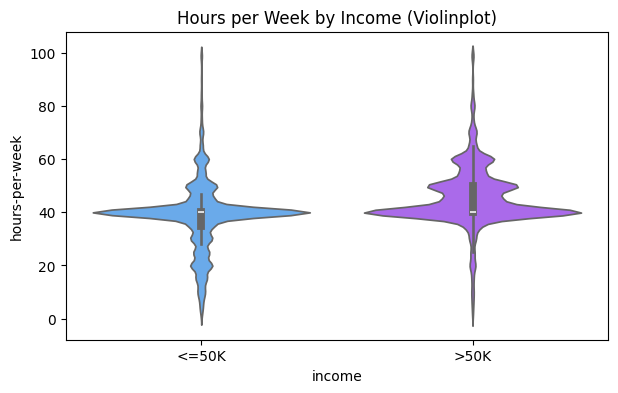

In [19]:
plt.figure(figsize=(7, 4))
sns.violinplot(x="income", y="hours-per-week", data=df, palette="cool")
plt.title("Hours per Week by Income (Violinplot)")
plt.show()

This is actually interesting to see. Regardless of income range it seems the distirbution in similar in both case, although higher income range does seem to have higher density in longer hours per week and vice versa.

/var/folders/ys/v8w470f90yj1swtgwn15jdkh0000gn/T/ipykernel_18262/746641274.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='workclass', y='hours-per-week', data=df, ci=None, palette='mako')
/var/folders/ys/v8w470f90yj1swtgwn15jdkh0000gn/T/ipykernel_18262/746641274.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='workclass', y='hours-per-week', data=df, ci=None, palette='mako')


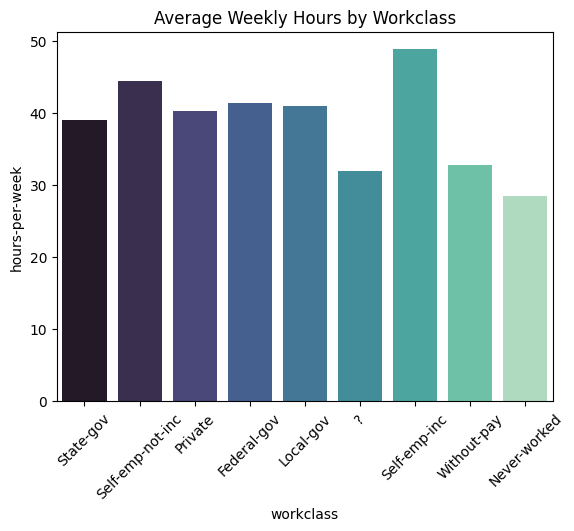

In [20]:
sns.barplot(x='workclass', y='hours-per-week', data=df, ci=None, palette='mako')
plt.xticks(rotation=45)
plt.title('Average Weekly Hours by Workclass')
plt.show()

Average seems to be around 40 hours per week.

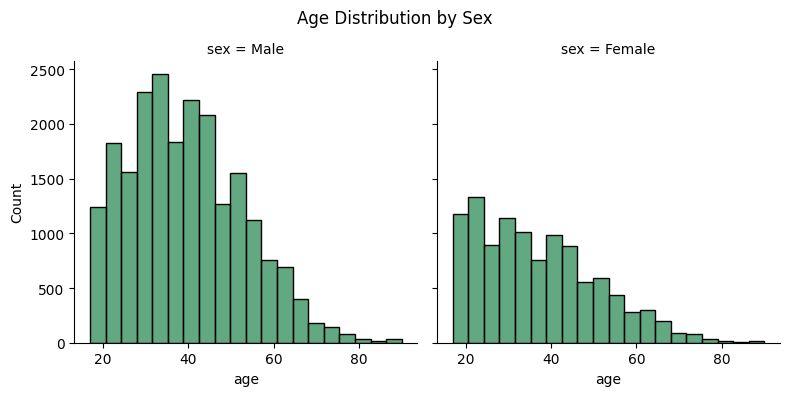

In [23]:
g = sns.FacetGrid(df, col="sex", height=4)
g.map(sns.histplot, "age", bins=20, color="seagreen")
g.fig.suptitle('Age Distribution by Sex')
g.fig.subplots_adjust(top=0.85)
plt.show()

Similar distribution overall, but there are more counts of male. General trend is more younger people in dataset than older people.

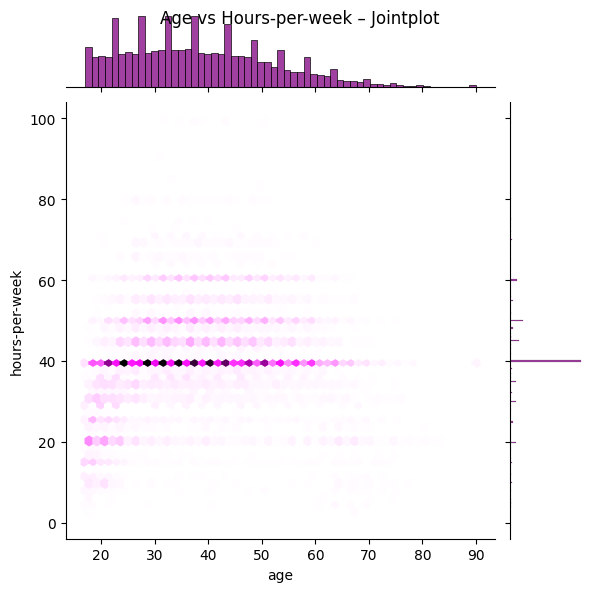

In [24]:
sns.jointplot(data=df, x="age", y="hours-per-week", kind="hex", color="purple")
plt.suptitle("Age vs Hours-per-week – Jointplot")
plt.show()

This plot does highlight 40 hours per week, as thought above.

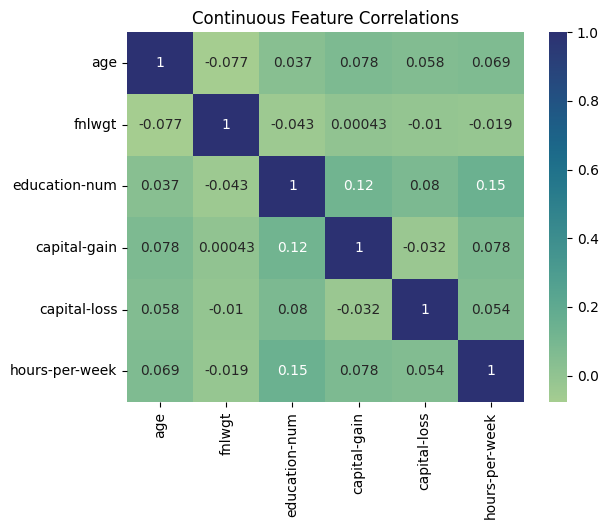

In [25]:
continuous_features = ["age", "fnlwgt", "education-num", "capital-gain", "capital-loss", "hours-per-week"]
sns.heatmap(df[continuous_features].corr(), annot=True, cmap="crest")
plt.title("Continuous Feature Correlations")
plt.show()

No meaningful insight found here at the moment.

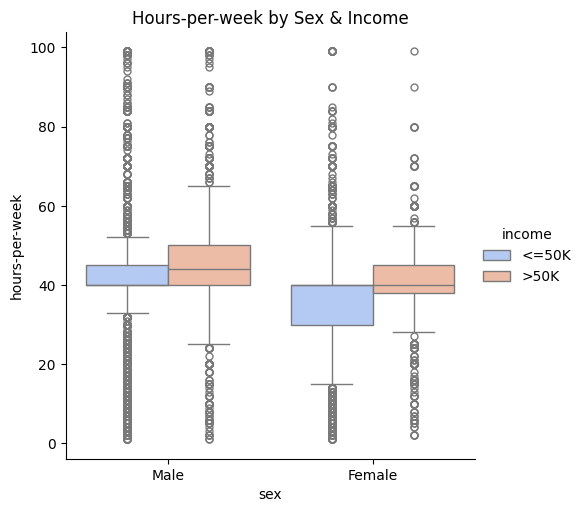

In [26]:
sns.catplot(x="sex", y="hours-per-week", hue="income", kind="box", data=df, palette="coolwarm")
plt.title("Hours-per-week by Sex & Income")
plt.show()

Not much difference in working hours and pay in terms of gender here. Although it seems that male work more and make more slightly for given dataset.

/var/folders/ys/v8w470f90yj1swtgwn15jdkh0000gn/T/ipykernel_18262/212893853.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x='income', y='age', data=df, palette='rocket')


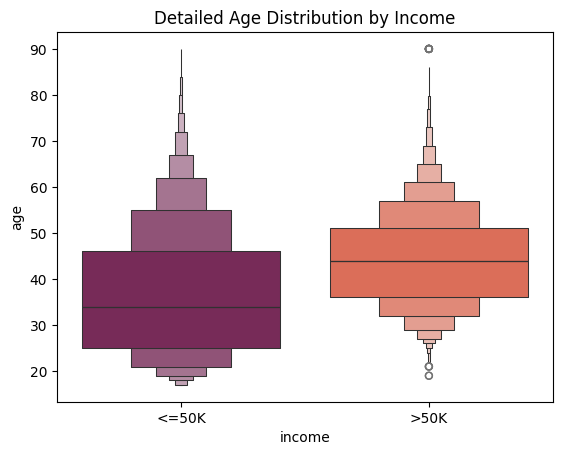

In [27]:
sns.boxenplot(x='income', y='age', data=df, palette='rocket')
plt.title('Detailed Age Distribution by Income')
plt.show()

Another plot that compares Age and Income. It does go along with previous observations.

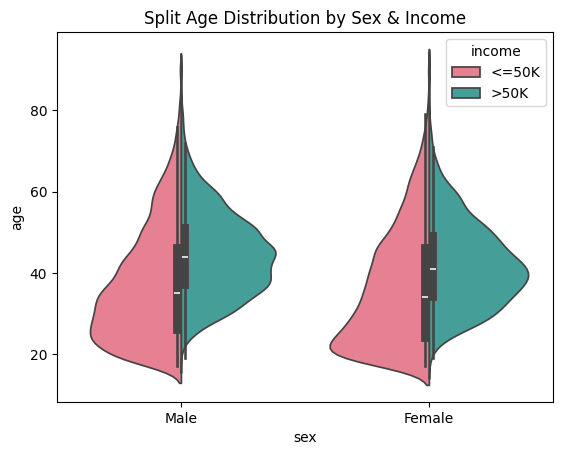

In [28]:
sns.violinplot(x="sex", y="age", hue="income", data=df, split=True, palette="husl")
plt.title("Split Age Distribution by Sex & Income")
plt.show()

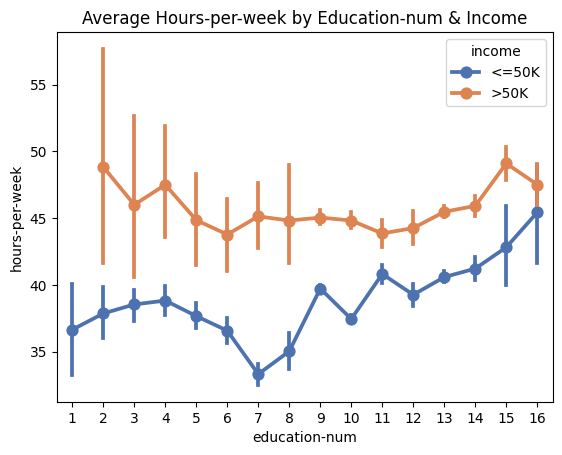

In [29]:
sns.pointplot(x="education-num", y="hours-per-week", hue="income", data=df, palette="deep")
plt.title("Average Hours-per-week by Education-num & Income")
plt.show()

Another definitive one, where we can see that >50k generally tends to work longer hours. I am not really sure of Education-num's association to this.

---

### EDA Observations

#### 1. Income Distribution
- About **25,000** individuals earn `<=50K` and roughly **7,500** earn `>50K`.

#### 2. Working Hours by Income
- Violin plot shows higher density of longer hours for `>50K` earners.
- **40 hours per week** is the most common for both income groups.

#### 3. Income vs Education Level
- Clear correlation between education and income:
    - Individuals who finished **high school** are mostly in the `<=50K` group.
    - **Bachelors and Masters** degrees show similar counts for both `<=50K` and `>50K`.
    - For **Masters and above**, the `>50K` group outnumbers the `<=50K` group.

#### 4. Age Distribution by Income
- **Younger age groups** have a higher density in the `<=50K` category.
- Age distribution for the `>50K` group is nearly normal, centered around age **45**.

#### 5. Geography
- Of **32,561** individuals, **29,170** (~90%) are based in the **United States**.

#### 6. Race Breakdown

| Race                 | Count  |
|----------------------|-------:|
| White                | 27,816 |
| Black                |  3,124 |
| Asian-Pac-Islander   |  1,039 |
| Amer-Indian-Eskimo   |    311 |
| Other                |    271 |

- Data is highly focused on White individuals accounting for 85%.

#### 7. Relationship Status Breakdown

| Relationship    | Count  |
|-----------------|-------:|
| Husband         | 13,193 |
| Not-in-family   |  8,305 |
| Own-child       |  5,068 |
| Unmarried       |  3,446 |
| Wife            |  1,568 |
| Other-relative  |    981 |

- The difference in husband/wife count is interesting.

---

---

### Hypothesis 1: Income and Education Level are Associated

**H1:** Individuals with higher than high school education (especially Masters and above) are more likely to earn >$50K.

- **Null Hypothesis (H₀):** There is **no association** between education level and income category.
- **Alternative Hypothesis (H₁):** There **is an association** between education level and income category.
- **Rationale:** Education is typically linked to higher-paying job opportunities and career advancement, making it reasonable to expect individuals with more advanced degrees to earn higher incomes.

---

### Hypothesis 2: Mean Age Differs by Income Group

**H2:** The `>50K` group has a higher mean age, while the `<=50K` group skews younger.

- **Null Hypothesis (H₀):** Mean age is **the same** for both income categories.
- **Alternative Hypothesis (H₁):** Mean age **differs** between income categories.
- **Rationale:** Greater work experience and seniority, which come with age, tend to lead to higher-paying positions, resulting in older individuals being overrepresented in the higher income group.

---

### Hypothesis 3: Distribution of Weekly Working Hours Differs by Income

**H3:** Individuals in the `>50K` group tend to work longer hours per week.

- **Null Hypothesis (H₀):** Distribution of hours-per-week is **the same** for both income categories.
- **Alternative Hypothesis (H₁):** Distribution of hours-per-week **differs** between income categories.
- **Rationale:** Higher earnings may be associated with either management roles or multiple jobs, both of which can require longer working hours.

---

---

### Testing Hypothesis 1: Income and Education Level are Associated

**Test Choice:** Chi-square test

**Why Appropriate:**  
We are comparing two categorical variables: education level and income category. The Chi-square test is suitable for assessing associations between categorical variables.


In [8]:
from scipy.stats import chi2_contingency

# Optionally, group very small categories in education if needed for robustness
edu_income_ct = pd.crosstab(df['education'], df['income'])
chi2, pval, dof, ex = chi2_contingency(edu_income_ct)
print(f"Chi-square test: statistic={chi2:.2f}, p-value={pval:.3g}")

Chi-square test: statistic=4429.65, p-value=0


Since the p-value is far below the standard significance threshold (e.g., 0.05), we **reject the null hypothesis**.

There is a highly significant association between education level and income category. In other words, **the distribution of income groups varies significantly across education levels.**

---

### Testing Hypothesis 2: Mean Age Differs by Income Group

**Test Choice:** Independent two-sample t-test

**Why Appropriate:**  
We are comparing the means of a numerical variable (age) between two groups defined by a categorical variable (income). The t-test is suitable for testing differences in means between two independent groups.


In [9]:
from scipy.stats import ttest_ind

age_low = df[df['income'] == '<=50K']['age']
age_high = df[df['income'] == '>50K']['age']

tstat, pval = ttest_ind(age_low, age_high, equal_var=False)
print(f"T-test: statistic={tstat:.2f}, p-value={pval:.3g}")

T-test: statistic=-50.26, p-value=0


Because the p-value is much smaller than 0.05, we **reject the null hypothesis**.

There is a significant difference in mean age between the two income groups.

The negative t-statistic implies that the **mean age for the <=50K group is lower than the mean age for the >50K group**.

---

### Testing Hypothesis 3: [Distribution of Weekly Working Hours Differs by Income]

**Test Choice:** Mann–Whitney U test

**Why appropriate:** We are comparing the distributions of a continuous variable (hours-per-week) between two independent income groups. The Mann–Whitney U test is a non-parametric test suitable when the assumption of normality may not hold.

In [12]:
from scipy.stats import mannwhitneyu

hours_low = df[df['income'] == '<=50K']['hours-per-week']
hours_high = df[df['income'] == '>50K']['hours-per-week']

u_stat, pval = mannwhitneyu(hours_low, hours_high, alternative='two-sided')
print(f"Mann-Whitney U: statistic={u_stat:.2f}, p-value={pval:.3g}")

Mann-Whitney U: statistic=63568779.00, p-value=0


The p-value is below the conventional significance threshold (e.g., 0.05), so we **reject the null hypothesis**.

There is a significant difference in the distribution of weekly working hours between the two income groups.

**People in the >50K group tend to work more hours per week, as supported by the earlier violin plot observations.**


---

## 5. Summary and Conclusions

### Key Findings from EDA

1. **Working Hours:** Individuals earning `>50K` show higher density in longer weekly working hours. However, 40 hours per week is the most common value for both income groups.
2. **Education Correlation:** Income is associated with education level. High school graduates are predominantly in the `<=50K` group, while those with Masters and above more often earn `>50K`.
3. **Age Distribution:** The `<=50K` group skews younger, while the age distribution for the `>50K` group is nearly normal, centered around 45 years.
4. **Population Distribution:** About 90% of individuals in the dataset are based in the United States.
5. **Demographic Characteristics:** The majority of individuals are White and male, with 'Husband' and 'Not-in-family' being the most common relationship statuses.

### Hypothesis Testing Results

| Hypothesis | Test Used            | p-value | Result      | Interpretation                                   |
|------------|---------------------|---------|-------------|--------------------------------------------------|
| **H1**     | Chi-square          | <0.0001 | Significant | Income and education level are associated.       |
| **H2**     | t-test              | <0.0001 | Significant | Mean age differs by income group.                |
| **H3**     | Mann-Whitney U test | <0.0001 | Significant | Weekly working hours distribution differs by income group. |

### Key Insights

- **Education and Income:** Income distributions differ significantly according to education level; these variables are not independent.
- **Age and Income:** Individuals earning `>50K` tend to be older compared to those earning `<=50K`.
- **Working Hours and Income:** The distribution of weekly working hours varies by income, with higher income groups generally working longer hours.

### Future Research Directions

- **Additional Variables:** Investigate the impact of factors such as occupation, marital status, and race on income.
- **Interaction Effects:** Examine whether combinations of variables (e.g., education and occupation) further explain income disparities.
- **Predictive Modeling:** Develop machine learning models to predict income category based on demographic and employment features.
- **Geographic Analysis:** Explore income differences among individuals not based in the United States.

---